In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

from pandas import ExcelWriter
from pandas import ExcelFile

from sklearn import linear_model
import sklearn.model_selection as model_selection

Assumptions for multiple linear regression: https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/

In [3]:
covid_data = pd.read_csv('master_state_data copy.csv')
#covid_data = covid_data.dropna()
covid_data = covid_data[covid_data.STATE != 'New York']
covid_data = covid_data[covid_data.STATE != 'District Of Columbia']
covid_data

,STATE,abbr,Density,Pop,LandArea,gdpRank,stateGDP,stateGDPperc,gdpGrowth2018,Airports,...,totalTestResults,fips,positive_04102020,negative_04102020,deaths_04102020,total_test_results_04102020,num_hospitals_2019,num_active_doct_2019,avg_income_2019,proportion_uninsured_2018
0,Alaska,AK,1.2863,734002,570641,46.0,54851.0,0.003,-0.3,767,...,4603,2,246,7186,7,7432,10.0,1900.0,91268.57,0.12
1,Alabama,AL,96.9221,4908621,50645,27.0,224654.0,0.011,2.0,316,...,7774,1,2968,18058,80,21026,90.0,12205.0,70090.35,0.10
2,Arkansas,AR,58.4030,3038999,52035,34.0,129812.0,0.006,0.9,304,...,7938,5,1171,15949,23,17120,52.0,7150.0,68079.14,0.08
3,Arizona,AZ,64.9550,7378494,113594,20.0,355311.0,0.017,4.0,298,...,21058,4,3112,34622,97,37734,72.0,17806.0,87823.18,0.11
4,California,CA,256.3727,39937489,155779,1.0,3018337.0,0.145,3.5,882,...,29927,6,19472,145391,541,164863,342.0,112906.0,102375.47,0.07
5,Colorado,CO,56.4011,5845526,103642,16.0,376994.0,0.018,3.5,447,...,16849,8,6510,26143,250,32653,55.0,14509.0,98129.07,0.08
6,Connecticut,CT,735.8689,3563077,4842,23.0,279653.0,0.013,1.0,123,...,16600,9,10538,25750,448,36288,34.0,15605.0,103865.55,0.05
8,Delaware,DE,504.3073,982895,1949,42.0,76537.0,0.004,0.3,42,...,4383,10,1326,10415,23,11741,8.0,3148.0,93957.11,0.06
9,Florida,FL,410.1256,21992985,53625,4.0,1059144.0,0.051,3.5,875,...,66484,12,17531,145299,390,162830,214.0,56499.0,78433.46,0.13
10,Georgia,GA,186.6719,10736059,57513,9.0,601503.0,0.029,2.6,454,...,20326,13,11483,34664,416,46147,111.0,25312.0,79797.68,0.14


In [50]:
#Checking multicollinearity assumption for multiple linear regression

df = pd.DataFrame(covid_data)
df = df.drop(["STATE", "abbr", "Pop", "gdpRank", "stateGDPperc", "gdpGrowth2018", "pvi","governorParty","senateParty","houseBalance","positive","positiveScore","negativeScore","negativeRegularScore","commercialScore","grade","score","negative","pending","hospitalized","death","total","totalTestResults","fips", "positive_04102020","negative_04102020","total_test_results_04102020", "deaths_04102020"], axis = 1)

#Automobiles and stateGDP (~0.98), Buses and stateGDP (~0.92), Buses and Automobiles (~0.94), 
#num_hospitals_2019 and stateGDP ~0.92), num_hospitals_2019 and Automobiles, num_hospitals_2019 and Buses,
#num_active_doct_2019 and the following: stateGDP, Automobiles, BUses, num_hospitals_2019


In [51]:
df.corr()

,Density,LandArea,stateGDP,Airports,Automobiles,Buses,num_hospitals_2019,num_active_doct_2019,avg_income_2019,proportion_uninsured_2018
Density,1.000000,-0.344437,0.176284,-0.105906,0.147583,0.151939,0.070470,0.260231,0.549422,-0.356028
LandArea,-0.344437,1.000000,0.164976,0.481639,0.126613,0.130439,0.160974,0.079315,-0.057519,0.460541
stateGDP,0.176284,0.164976,1.000000,0.707783,0.981984,0.920599,0.915290,0.966842,0.248035,0.173345
Airports,-0.105906,0.481639,0.707783,1.000000,0.700324,0.741576,0.847036,0.686929,-0.026697,0.486360
Automobiles,0.147583,0.126613,0.981984,0.700324,1.000000,0.938904,0.926869,0.973118,0.172345,0.197511
Buses,0.151939,0.130439,0.920599,0.741576,0.938904,1.000000,0.913632,0.927990,0.153151,0.227395
num_hospitals_2019,0.070470,0.160974,0.915290,0.847036,0.926869,0.913632,1.000000,0.913304,-0.006138,0.365540
num_active_doct_2019,0.260231,0.079315,0.966842,0.686929,0.973118,0.927990,0.913304,1.000000,0.251001,0.091121
avg_income_2019,0.549422,-0.057519,0.248035,-0.026697,0.172345,0.153151,-0.006138,0.251001,1.000000,-0.442790
proportion_uninsured_2018,-0.356028,0.460541,0.173345,0.486360,0.197511,0.227395,0.365540,0.091121,-0.442790,1.000000


In [15]:
#reg = linear_model.LinearRegression()
#reg.fit(covid_data[['Density', 'LandArea', 'stateGDP', 'Airports', 
                    'Automobiles', 'Buses']], covid_data[['deaths_04102020']])

IndentationError: unexpected indent (<ipython-input-15-5198da333af9>, line 3)

Text(0, 0.5, 'Number of COVID-19 cases')

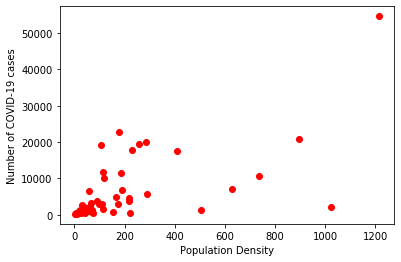

In [23]:
plt.scatter(covid_data["Density"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Population Density')
plt.ylabel('Number of COVID-19 cases')

#Shows linear trend

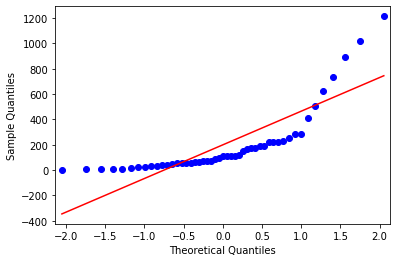

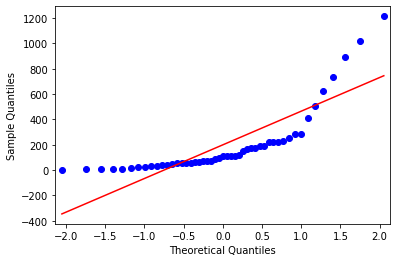

In [32]:
qqplot(covid_data["Density"], line = 's')

#Doesn't satisfy normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

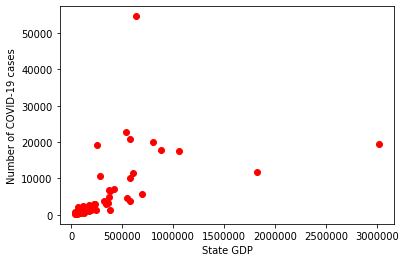

In [24]:
plt.scatter(covid_data["stateGDP"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('State GDP')
plt.ylabel('Number of COVID-19 cases')

#Shows linear trend

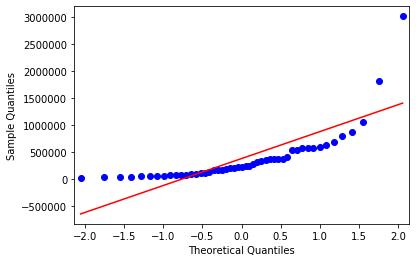

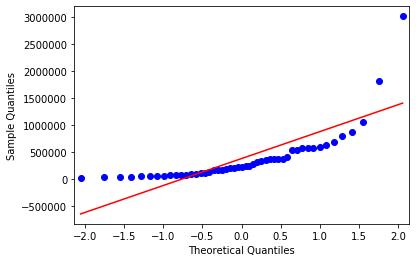

In [35]:
qqplot(covid_data["stateGDP"], line = 's')

#Doesn't satisfy normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

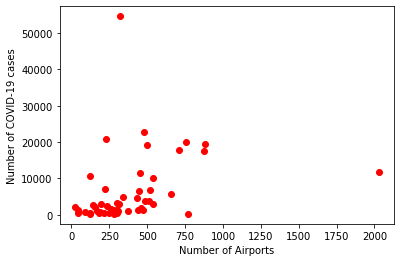

In [27]:
plt.scatter(covid_data["Airports"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Number of Airports')
plt.ylabel('Number of COVID-19 cases')

#Shows linear trend

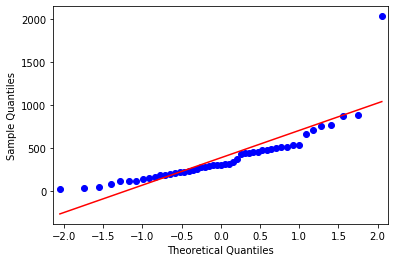

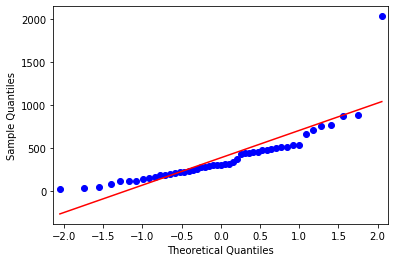

In [36]:
qqplot(covid_data["Airports"], line = 's')

#Satisfies normality assumption (except one outlier at the top right corner)

Text(0, 0.5, 'Number of COVID-19 cases')

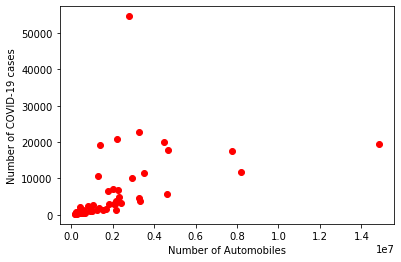

In [4]:
plt.scatter(covid_data["Automobiles"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Number of Automobiles')
plt.ylabel('Number of COVID-19 cases')

#shows linear trend

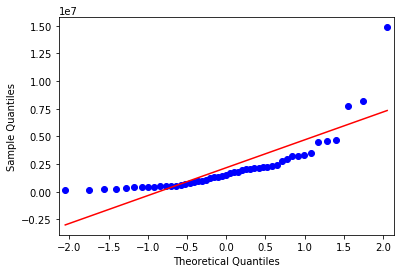

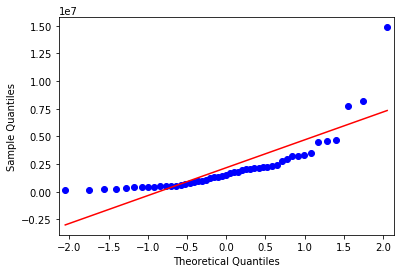

In [37]:
qqplot(covid_data["Automobiles"], line = 's')

#Relatively checks normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

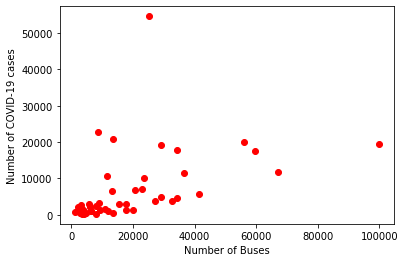

In [6]:
plt.scatter(covid_data["Buses"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Number of Buses')
plt.ylabel('Number of COVID-19 cases')

#Shows very linear trend (except one outlier at the top of the graph). 

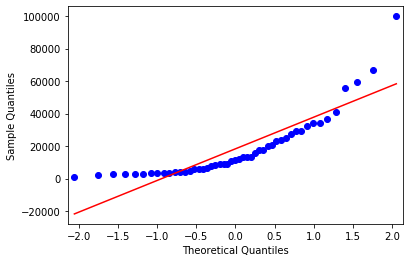

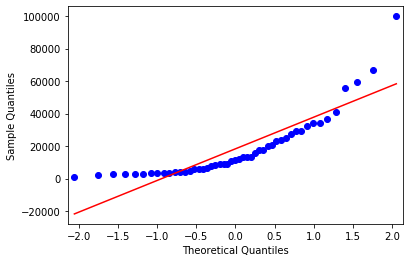

In [38]:
qqplot(covid_data["Buses"], line = 's')

#Doesn't check normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

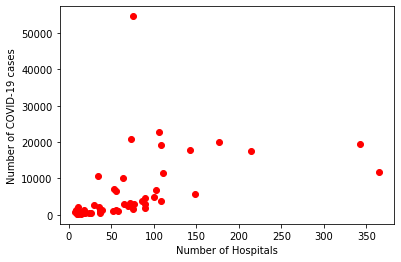

In [8]:
plt.scatter(covid_data["num_hospitals_2019"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Number of Hospitals')
plt.ylabel('Number of COVID-19 cases')

#Shows very linear trend (except one outlier at the top of the graph). 

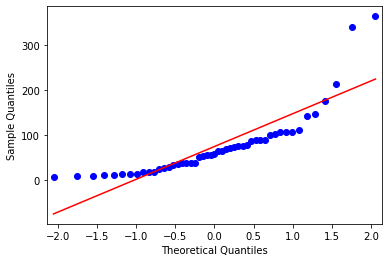

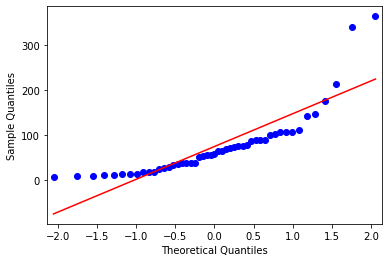

In [39]:
qqplot(covid_data["num_hospitals_2019"], line = 's')

#Doesn't check normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

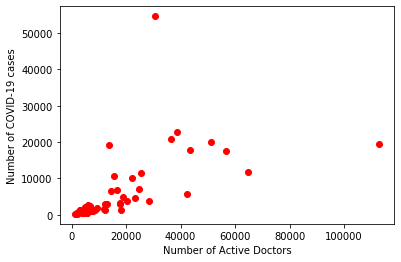

In [10]:
plt.scatter(covid_data["num_active_doct_2019"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Number of Active Doctors')
plt.ylabel('Number of COVID-19 cases')

#Shows linear trend (except one outlier at the top of the graph). 

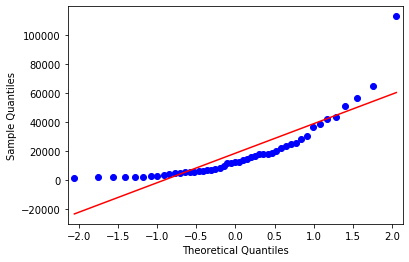

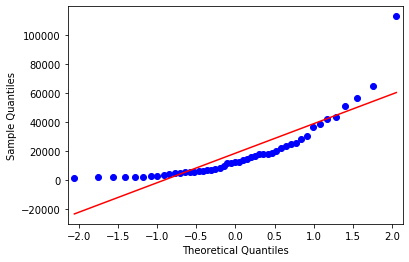

In [40]:
qqplot(covid_data["num_active_doct_2019"], line = 's')

#Doesn't check normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

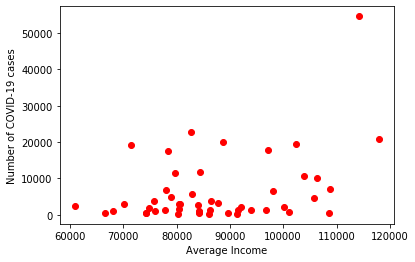

In [12]:
plt.scatter(covid_data["avg_income_2019"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Average Income')
plt.ylabel('Number of COVID-19 cases')

#Doesn't show a very linear trend

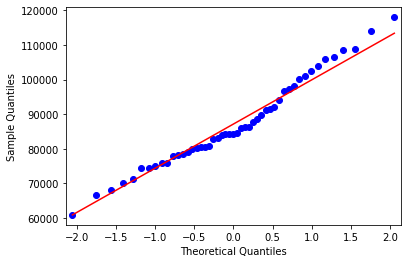

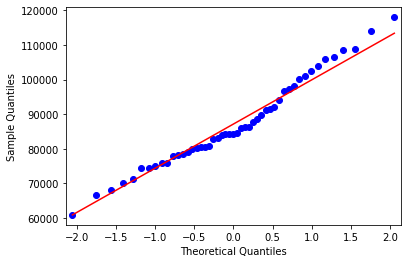

In [41]:
qqplot(covid_data["avg_income_2019"], line = 's')

#Barely checks normality assumption

Text(0, 0.5, 'Number of COVID-19 cases')

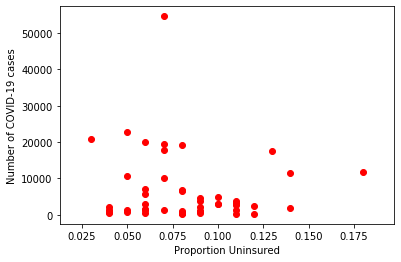

In [14]:
plt.scatter(covid_data["proportion_uninsured_2018"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Proportion Uninsured')
plt.ylabel('Number of COVID-19 cases')

#Definitely doesn't show linear trend

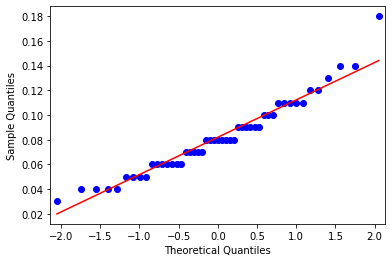

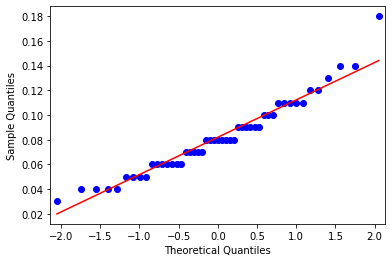

In [42]:
qqplot(covid_data["proportion_uninsured_2018"], line = 's')

#Doesn't check normality assumption


Text(0, 0.5, 'Number of Deaths')

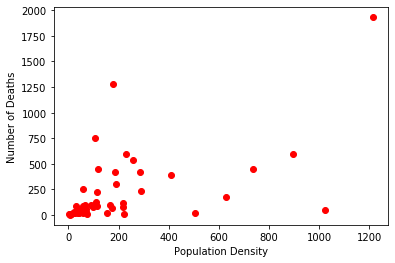

In [25]:
plt.scatter(covid_data["Density"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Population Density')
plt.ylabel('Number of Deaths')

#Shows linear trend

Text(0, 0.5, 'Number of COVID-19 cases')

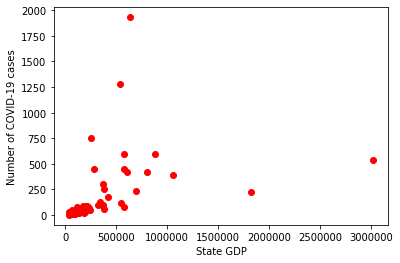

In [26]:
plt.scatter(covid_data["stateGDP"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('State GDP')
plt.ylabel('Number of COVID-19 cases')

#Shows linear trend

Text(0, 0.5, 'Number of Deaths')

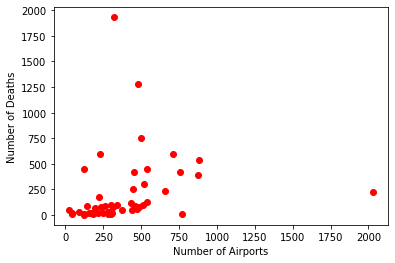

In [28]:
plt.scatter(covid_data["Airports"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Number of Airports')
plt.ylabel('Number of Deaths')

#Shows linear trend

Text(0, 0.5, 'Number of Deaths')

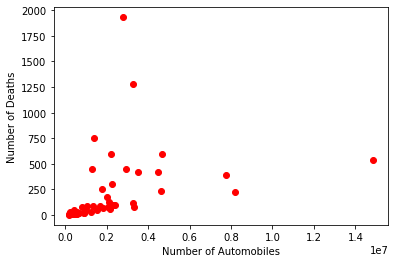

In [5]:
plt.scatter(covid_data["Automobiles"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Number of Automobiles')
plt.ylabel('Number of Deaths')

#shows linear trend

Text(0, 0.5, 'Number of Deaths')

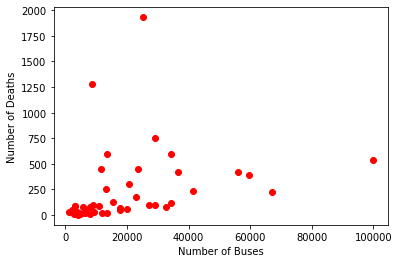

In [7]:
plt.scatter(covid_data["Buses"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Number of Buses')
plt.ylabel('Number of Deaths')

#Shows very linear trend (except two outliers at the top of the graph). 

Text(0, 0.5, 'Number of Deaths')

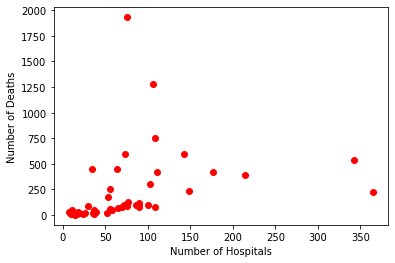

In [9]:
plt.scatter(covid_data["num_hospitals_2019"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Number of Hospitals')
plt.ylabel('Number of Deaths')

#Shows linear trend (except two outliers at the top of the graph). 

Text(0, 0.5, 'Number of Deaths')

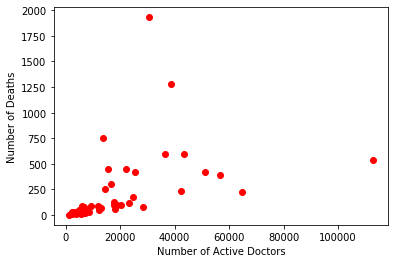

In [11]:
plt.scatter(covid_data["num_active_doct_2019"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Number of Active Doctors')
plt.ylabel('Number of Deaths')

#Shows somewhat linear trend

Text(0, 0.5, 'Number of Deaths')

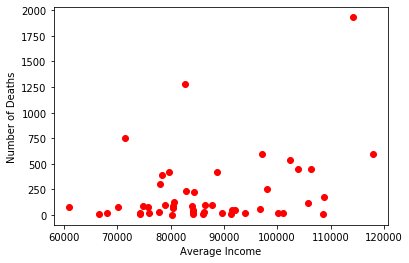

In [13]:
plt.scatter(covid_data["avg_income_2019"], covid_data["deaths_04102020"], color = 'red')
plt.xlabel('Average Income')
plt.ylabel('Number of Deaths')

#Doesn't show a linear trend

Text(0, 0.5, 'Number of Deaths')

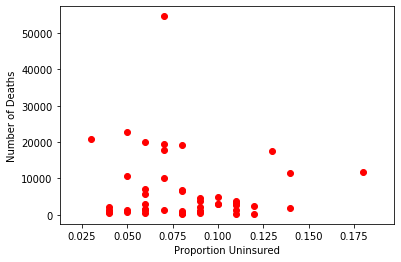

In [15]:
plt.scatter(covid_data["proportion_uninsured_2018"], covid_data["positive_04102020"], color = 'red')
plt.xlabel('Proportion Uninsured')
plt.ylabel('Number of Deaths')

#Doesn't show a linear trend

In [52]:
model = smf.ols(formula = 'deaths_04102020 ~ Density + LandArea + stateGDP + Airports + Automobiles + Buses + num_hospitals_2019 + num_active_doct_2019 + avg_income_2019 + proportion_uninsured_2018 + Automobiles*stateGDP + Buses*stateGDP + Buses*Automobiles + num_hospitals_2019*stateGDP + num_hospitals_2019*Automobiles + num_hospitals_2019*Buses + num_active_doct_2019*stateGDP + num_active_doct_2019*Automobiles + num_active_doct_2019*Buses + num_active_doct_2019*num_hospitals_2019', data = covid_data).fit()
summary = model.summary()
summary.tables[1]

#Statistically significant coefficients for these predictor variables:
#stateGDP, Automobiles, num_active_doct_2019, proportion_uninsured_2018 (in model with no interaction terms)
#Automobiles, num_active_doct_2019 (in model with interaction terms)

#Statistically significant coefficients for these predictor variables (after checking linearity assumption):
#Density and num_active_doct_2019 (in model with no interaction terms)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-275.0870,450.010,-0.611,0.546,-1195.461,645.287
Density,0.5589,0.186,3.011,0.005,0.179,0.939
LandArea,-0.0009,0.001,-1.272,0.213,-0.002,0.001
stateGDP,0.0025,0.002,1.315,0.199,-0.001,0.006
Airports,0.7193,0.433,1.662,0.107,-0.166,1.605
Automobiles,-8.623e-05,0.000,-0.246,0.808,-0.001,0.001
Buses,-0.0197,0.022,-0.902,0.375,-0.064,0.025
num_hospitals_2019,1.5658,4.779,0.328,0.746,-8.208,11.340
num_active_doct_2019,-0.0391,0.032,-1.223,0.231,-0.105,0.026
avg_income_2019,0.0005,0.004,0.113,0.911,-0.009,0.010


In the multiple linear regression model with interaction terms (that showed collinearity with correlation > 0.80) for predicting deaths, the variables with statistically significant coefficients are Density, Automobiles:stateGDP, Buses:stateGDP, Buses:Automobiles, num_hospitals_2019:Buses, num_active_doct_2019:Automobiles, num_active_doct_2019:Buses.

In [54]:
model = smf.ols(formula = 'deaths_04102020 ~ Density + LandArea + Airports + avg_income_2019 + proportion_uninsured_2018', data = covid_data).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-16.2387,428.356,-0.038,0.970,-880.101,847.624
Density,0.7089,0.201,3.532,0.001,0.304,1.114
LandArea,-0.0004,0.001,-0.588,0.559,-0.002,0.001
Airports,0.3736,0.161,2.321,0.025,0.049,0.698
avg_income_2019,0.0004,0.004,0.097,0.923,-0.008,0.009
proportion_uninsured_2018,-805.3132,1882.408,-0.428,0.671,-4601.550,2990.924


The multiple linear regression above is the previous regression with the variables with high collinearity removed (instead of keeping them in and adding interaction terms to account for the collinearity). 
-The variables with statistically significant coefficients in this model are Density and Airports.

In [53]:
model2 = smf.ols(formula = 'positive_04102020 ~ Density + LandArea + stateGDP + Airports + Automobiles + Buses + num_hospitals_2019 + num_active_doct_2019 + avg_income_2019 + proportion_uninsured_2018 + Automobiles*stateGDP + Buses*stateGDP + Buses*Automobiles + num_hospitals_2019*stateGDP + num_hospitals_2019*Automobiles + num_hospitals_2019*Buses + num_active_doct_2019*stateGDP + num_active_doct_2019*Automobiles + num_active_doct_2019*Buses + num_active_doct_2019*num_hospitals_2019', data = covid_data).fit()
summary2 = model2.summary()
summary2.tables[1]

#Statistically significant coefficients for these predictor variables:
#stateGDP, Automobiles, num_active_doct_2019, proportion_uninsured_2018 (with no interaction terms)
#num_active_doct_2019 (with interaction terms)

#Statistically significant coefficients for these predictor variables (after checking linearity assumption):
#Density and num_active_doct_2019 (in model with no interaction terms)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-6680.2932,1.18e+04,-0.567,0.575,-3.08e+04,1.74e+04
Density,14.3936,4.857,2.964,0.006,4.461,24.327
LandArea,-0.0201,0.018,-1.135,0.266,-0.056,0.016
stateGDP,0.0681,0.050,1.372,0.180,-0.033,0.170
Airports,16.2718,11.325,1.437,0.161,-6.891,39.435
Automobiles,-0.0007,0.009,-0.071,0.944,-0.019,0.018
Buses,-0.5799,0.572,-1.014,0.319,-1.749,0.589
num_hospitals_2019,26.8928,125.026,0.215,0.831,-228.815,282.600
num_active_doct_2019,-1.2278,0.837,-1.467,0.153,-2.940,0.484
avg_income_2019,0.0118,0.117,0.101,0.920,-0.227,0.251


In the multiple linear regression model with interaction terms (that showed collinearity with correlation > 0.80) for predicting number of COVID-19 cases, the variables with statistically significant coefficients are Density, Automobiles:stateGDP, Buses:stateGDP, Buses:Automobiles, num_hospitals_2019:Buses, num_active_doct_2019:Automobiles, num_active_doct_2019:Buses.

In [55]:
model = smf.ols(formula = 'positive_04102020 ~ Density + LandArea + Airports + avg_income_2019 + proportion_uninsured_2018', data = covid_data).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-6252.9609,1.02e+04,-0.611,0.544,-2.69e+04,1.44e+04
Density,21.4757,4.792,4.482,0.000,11.812,31.140
LandArea,-0.0140,0.015,-0.949,0.348,-0.044,0.016
Airports,12.5072,3.843,3.255,0.002,4.758,20.257
avg_income_2019,0.0480,0.104,0.464,0.645,-0.161,0.257
proportion_uninsured_2018,5341.6343,4.49e+04,0.119,0.906,-8.53e+04,9.6e+04


The multiple linear regression above is the previous regression with the variables with high collinearity removed (instead of keeping them in and adding interaction terms to account for the collinearity). 
-The variables with statistically significant coefficients in this model are Density and Airports.